# Install and load necesary packages

In [3]:
# Please don't change this cell

import pandas as pd
import numpy as np  

import warnings
warnings.filterwarnings("ignore")

## Load the dataset using pandas

In [5]:
# Please don't change this cell
df = pd.read_csv('ml-100k/u.data', names=['user_id', 'item_id', 'rating', 'timestamp'], sep='\t')

df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


# Split dataset


## Randomly select one rating from each user as test set

In [8]:
# please do not change this cell

from sklearn.model_selection import train_test_split

n_users = df.user_id.unique().shape[0]
n_items = df.item_id.unique().shape[0]
print(str(n_users) + ' users')
print(str(n_items) + ' items')

train_df, test_df = train_test_split(df, test_size=0.2, random_state = 10)
train_df, test_df

# Training Dataset
train_ds = np.zeros((n_users, n_items))
item_popularity = np.zeros(n_items)
for row in train_df.itertuples():
    train_ds[row[1]-1, row[2]-1] = row[3]
    item_popularity[row[2]-1] =  item_popularity[row[2]-1] + 1
#train_ds = pd.DataFrame(train_ds)

# Testing Dataset
testsize = 0
test_ds = np.zeros((n_users, n_items))
for row in test_df.itertuples():
    if item_popularity[row[2]-1] > 30:
        test_ds[row[1]-1, row[2]-1] = row[3]
        testsize = testsize + 1
#test_ds = pd.DataFrame(test_ds)

print("Construct the rating matrix based on train_df:")
print(train_ds)

print("Construct the rating matrix based on test_df:")
print(test_ds)

print("Testsize = " + str(testsize))

943 users
1682 items
Construct the rating matrix based on train_df:
[[0. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]
Construct the rating matrix based on test_df:
[[5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Testsize = 17678


# MAE and RMSE Utils

In [10]:
# Please don't change this cell
# you can use this devaluate Utils here, and you can also implement your own MAE and RMSE calculation. 

EPSILON = 1e-9

def evaluate(test_ds, predicted_ds):
    '''
    Function for evaluating on MAE and RMSE
    '''
    # MAE
    mask_test_ds = test_ds > 0
    MAE = np.sum(np.abs(test_ds[mask_test_ds] - predicted_ds[mask_test_ds])) / np.sum(mask_test_ds.astype(np.float32))

    # RMSE
    RMSE = np.sqrt(np.sum(np.square(test_ds[mask_test_ds] - predicted_ds[mask_test_ds])) / np.sum(mask_test_ds.astype(np.float32)))

    return MAE, RMSE

# Your Solution for Method 1

In [12]:
# Method 1: Predict ratings using average rating of each user

# Create an array to store predictions
predicted_user_avg = np.zeros((n_users, n_items))

# Calculate average rating for each user based on train_ds
user_avg = np.true_divide(train_ds.sum(axis=1), (train_ds != 0).sum(axis=1))

# Predict ratings for test_ds positions using user averages
for user_id in range(n_users):
    for item_id in range(n_items):
        if test_ds[user_id, item_id] > 0:
            predicted_user_avg[user_id, item_id] = user_avg[user_id]

MAE_solution1, RMSE_solution1 = evaluate(test_ds, predicted_user_avg)

In [13]:
# Please don't change this cell

print("===================== The MAE and RMSE of Your Implementation =====================")
print("MAE: {}, RMSE: {}" .format(MAE_solution1, RMSE_solution1))

===================== The MAE and RMSE of Your Implementation =====================
MAE: 0.8258905090105331, RMSE: 1.031143070595138


# Your Solution for Method 2

In [15]:
# Method 2: Predict ratings using average rating of each item

# Create prediction array
predicted_item_avg = np.zeros((n_users, n_items))

# Calculate average rating for each item
item_avg = np.true_divide(train_ds.sum(axis=0), (train_ds != 0).sum(axis=0))

# Predict using item averages
for user_id in range(n_users):
    for item_id in range(n_items):
        if test_ds[user_id, item_id] > 0:
            predicted_item_avg[user_id, item_id] = item_avg[item_id]
# Evaluate
MAE_solution2, RMSE_solution2 = evaluate(test_ds, predicted_item_avg)

In [16]:
# Please don't change this cell

print("===================== The MAE and RMSE of Your Implementation =====================")
print("MAE: {}, RMSE: {}" .format(MAE_solution2, RMSE_solution2))

===================== The MAE and RMSE of Your Implementation =====================
MAE: 0.7961203950990416, RMSE: 1.0013142101585724


# Your Solution for Method 3

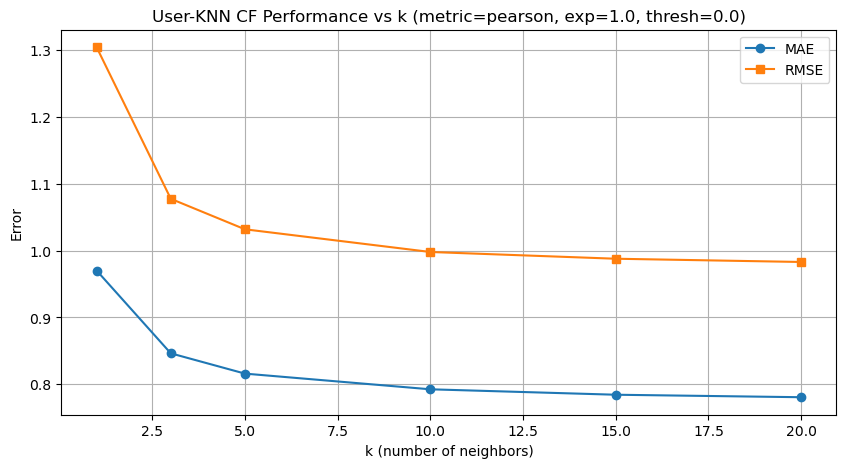


All Results (MAE, RMSE) for each hyperparameter combination:

Metric: cosine  | k:  1 | Exponent: 0.5 | Threshold: 0.0 -> MAE: 0.9739, RMSE: 1.3130
Metric: cosine  | k:  1 | Exponent: 0.5 | Threshold: 0.1 -> MAE: 0.9739, RMSE: 1.3130
Metric: cosine  | k:  1 | Exponent: 0.5 | Threshold: 0.2 -> MAE: 0.9741, RMSE: 1.3131
Metric: cosine  | k:  1 | Exponent: 1.0 | Threshold: 0.0 -> MAE: 0.9739, RMSE: 1.3130
Metric: cosine  | k:  1 | Exponent: 1.0 | Threshold: 0.1 -> MAE: 0.9739, RMSE: 1.3130
Metric: cosine  | k:  1 | Exponent: 1.0 | Threshold: 0.2 -> MAE: 0.9741, RMSE: 1.3131
Metric: cosine  | k:  3 | Exponent: 0.5 | Threshold: 0.0 -> MAE: 0.8590, RMSE: 1.0954
Metric: cosine  | k:  3 | Exponent: 0.5 | Threshold: 0.1 -> MAE: 0.8590, RMSE: 1.0954
Metric: cosine  | k:  3 | Exponent: 0.5 | Threshold: 0.2 -> MAE: 0.8596, RMSE: 1.0967
Metric: cosine  | k:  3 | Exponent: 1.0 | Threshold: 0.0 -> MAE: 0.8593, RMSE: 1.0952
Metric: cosine  | k:  3 | Exponent: 1.0 | Threshold: 0.1 -> MAE: 0.8593, RMSE

In [18]:
import matplotlib.pyplot as plt

EPSILON = 1e-9

def evaluate(test_ds, predicted_ds):
    mask_test_ds = test_ds > 0
    MAE = np.sum(np.abs(test_ds[mask_test_ds] - predicted_ds[mask_test_ds])) / np.sum(mask_test_ds.astype(np.float32))
    RMSE = np.sqrt(np.sum(np.square(test_ds[mask_test_ds] - predicted_ds[mask_test_ds])) / np.sum(mask_test_ds.astype(np.float32)))
    return MAE, RMSE

def cosine_similarity(matrix):
    norm = np.linalg.norm(matrix, axis=1, keepdims=True)
    norm[norm == 0] = EPSILON
    normalized = matrix / norm
    return np.dot(normalized, normalized.T)

def pearson_similarity(matrix):
    # Mean center rows
    mean_user = np.true_divide(matrix.sum(1),(matrix != 0).sum(1) + EPSILON)
    matrix_centered = matrix - mean_user[:, None]
    matrix_centered[matrix == 0] = 0  # keep zeros for missing ratings
    
    norm = np.linalg.norm(matrix_centered, axis=1, keepdims=True)
    norm[norm == 0] = EPSILON
    normalized = matrix_centered / norm
    return np.dot(normalized, normalized.T)

def user_knn_predict(train_ds, test_ds, user_avg, global_avg,
                     similarity_metric='cosine', k=5,
                     sim_exponent=1.0, sim_threshold=0.0):
    '''
    Predict test_ds ratings using User KNN with tuning options.
    similarity_metric: 'cosine' or 'pearson'
    k: number of neighbors
    sim_exponent: power to raise similarity weights (e.g. 1 for linear, 0.5 for sqrt damping)
    sim_threshold: minimum similarity to consider a neighbor
    
    Returns predicted rating matrix.
    '''
    n_users, n_items = train_ds.shape
    
    # Compute similarity matrix
    if similarity_metric == 'cosine':
        user_similarity = cosine_similarity(train_ds)
    elif similarity_metric == 'pearson':
        user_similarity = pearson_similarity(train_ds)
    else:
        raise ValueError("Unknown similarity metric")
    
    predicted_knn = np.zeros((n_users, n_items))
    
    for user_id in range(n_users):
        for item_id in range(n_items):
            if test_ds[user_id, item_id] > 0:
                sim = user_similarity[user_id]
                ratings = train_ds[:, item_id]

                valid = ratings > 0
                sim_valid = sim[valid]
                ratings_valid = ratings[valid]

                # Filter neighbors by similarity threshold
                threshold_mask = sim_valid >= sim_threshold
                sim_valid = sim_valid[threshold_mask]
                ratings_valid = ratings_valid[threshold_mask]

                # Sort neighbors by similarity
                if len(sim_valid) >= k:
                    top_k_idx = np.argsort(sim_valid)[-k:]
                else:
                    top_k_idx = np.argsort(sim_valid)

                top_k_sim = sim_valid[top_k_idx]
                top_k_ratings = ratings_valid[top_k_idx]

                # Apply similarity exponent weighting
                weights = top_k_sim ** sim_exponent

                if np.sum(weights) > 0:
                    predicted_knn[user_id, item_id] = np.dot(weights, top_k_ratings) / np.sum(weights)
                else:
                    # Fallback: user avg, then global avg if user avg not available
                    fallback = user_avg[user_id]
                    if fallback == 0:
                        fallback = global_avg
                    predicted_knn[user_id, item_id] = fallback
    
    return predicted_knn

# Define hyperparameter search space
k_values = [1, 3, 5, 10, 15, 20]
sim_exponents = [0.5, 1.0]          # sqrt damping, linear
sim_thresholds = [0.0, 0.1, 0.2]   # similarity cutoff
similarity_metrics = ['cosine', 'pearson']

results = {}
best_rmse = float('inf')
best_predicted = None
best_params = {}

global_avg = train_ds[train_ds > 0].mean()

for metric in similarity_metrics:
    for k in k_values:
        for exp in sim_exponents:
            for thresh in sim_thresholds:
                pred = user_knn_predict(train_ds, test_ds, user_avg, global_avg,
                                        similarity_metric=metric,
                                        k=k,
                                        sim_exponent=exp,
                                        sim_threshold=thresh)
                mae, rmse = evaluate(test_ds, pred)
                results[(metric, k, exp, thresh)] = (mae, rmse)

                # Track best result by RMSE
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_mae = mae
                    best_predicted = pred
                    best_params = {'metric': metric, 'k': k, 'sim_exponent': exp, 'sim_threshold': thresh}

# Store final optimized results
MAE_solution3, RMSE_solution3 = best_mae, best_rmse

# For plotting, fix similarity metric to best, and plot MAE and RMSE vs k for best exponent & threshold
filtered_results = {k: results[(best_params['metric'], k, best_params['sim_exponent'], best_params['sim_threshold'])] for k in k_values}

mae_vals = [filtered_results[k][0] for k in k_values]
rmse_vals = [filtered_results[k][1] for k in k_values]

plt.figure(figsize=(10,5))
plt.plot(k_values, mae_vals, marker='o', label='MAE')
plt.plot(k_values, rmse_vals, marker='s', label='RMSE')
plt.title(f'User-KNN CF Performance vs k (metric={best_params["metric"]}, exp={best_params["sim_exponent"]}, thresh={best_params["sim_threshold"]})')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.savefig("method3.png")
plt.show()

print("\nAll Results (MAE, RMSE) for each hyperparameter combination:\n")
for (metric, k, exp, thresh), (mae, rmse) in sorted(results.items()):
    print(f"Metric: {metric:<7} | k: {k:>2} | Exponent: {exp:<3} | Threshold: {thresh:<3} -> MAE: {mae:.4f}, RMSE: {rmse:.4f}")
print(f"Best Parameters: {best_params} -> MAE: {MAE_solution3:.4f}, RMSE: {RMSE_solution3:.4f}")

In [19]:
# Please don't change this cell

print("===================== The MAE and RMSE of Your Implementation =====================")
print("MAE: {}, RMSE: {}" .format(MAE_solution3, RMSE_solution3))

===================== The MAE and RMSE of Your Implementation =====================
MAE: 0.7805091434791094, RMSE: 0.9830183264349696


# Your Solution for Method 4

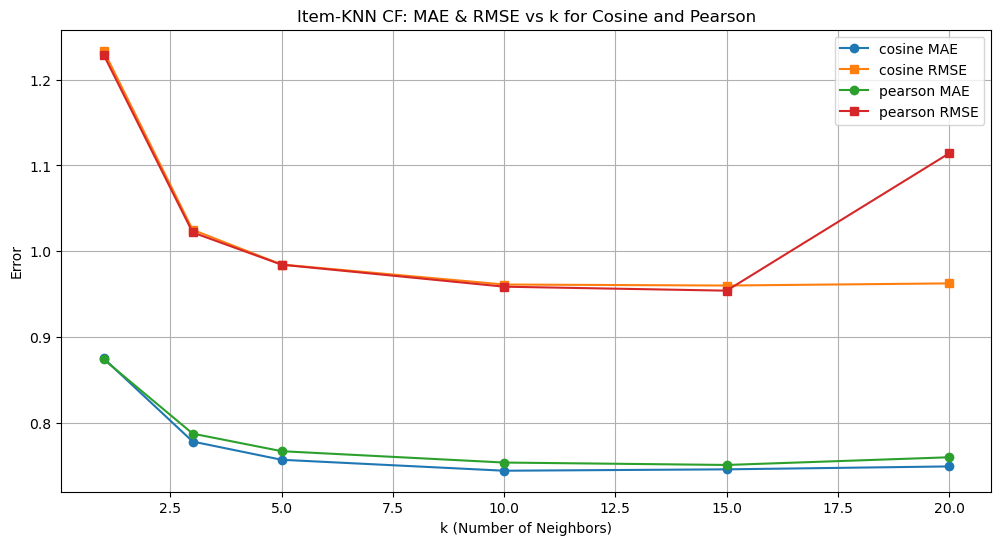


All Results for Item-KNN (MAE, RMSE) per similarity metric and k:

Metric: cosine  | k:  1 -> MAE: 0.8752, RMSE: 1.2336
Metric: cosine  | k:  3 -> MAE: 0.7783, RMSE: 1.0249
Metric: cosine  | k:  5 -> MAE: 0.7570, RMSE: 0.9845
Metric: cosine  | k: 10 -> MAE: 0.7443, RMSE: 0.9612
Metric: cosine  | k: 15 -> MAE: 0.7459, RMSE: 0.9600
Metric: cosine  | k: 20 -> MAE: 0.7493, RMSE: 0.9625
Metric: pearson | k:  1 -> MAE: 0.8740, RMSE: 1.2288
Metric: pearson | k:  3 -> MAE: 0.7875, RMSE: 1.0219
Metric: pearson | k:  5 -> MAE: 0.7670, RMSE: 0.9843
Metric: pearson | k: 10 -> MAE: 0.7538, RMSE: 0.9587
Metric: pearson | k: 15 -> MAE: 0.7510, RMSE: 0.9541
Metric: pearson | k: 20 -> MAE: 0.7600, RMSE: 1.1140

Best metric: pearson -> MAE: 0.7510, RMSE: 0.9541


In [21]:
# Define similarity metric functions
similarity_metrics = {
    'cosine': cosine_similarity,
    'pearson': pearson_similarity
}

# Candidate k values to try
k_values = [1, 3, 5, 10, 15, 20]

# To track best results across all metrics
best_overall_rmse = float('inf')
best_metric = None
best_k_item = None
best_predicted_item_knn = None
all_results_item_knn = {}

for metric_name, sim_func in similarity_metrics.items():
    
    item_similarity = sim_func(train_ds.T)
    results_item_knn = {}

    for k in k_values:
        predicted_item_knn = np.zeros((n_users, n_items))

        for user_id in range(n_users):
            user_ratings = train_ds[user_id]
            for item_id in range(n_items):
                if test_ds[user_id, item_id] > 0:
                    sim = item_similarity[item_id]
                    rated_items = user_ratings > 0

                    sim_valid = sim[rated_items]
                    ratings_valid = user_ratings[rated_items]

                    if len(sim_valid) >= k:
                        top_k_idx = np.argsort(sim_valid)[-k:]
                    else:
                        top_k_idx = np.argsort(sim_valid)

                    top_k_sim = sim_valid[top_k_idx]
                    top_k_ratings = ratings_valid[top_k_idx]

                    if np.sum(top_k_sim) > 0:
                        predicted_item_knn[user_id, item_id] = np.dot(top_k_sim, top_k_ratings) / np.sum(top_k_sim)
                    else:
                        predicted_item_knn[user_id, item_id] = item_avg[item_id]

        mae, rmse = evaluate(test_ds, predicted_item_knn)
        results_item_knn[k] = (mae, rmse)

        # Save best result across all metrics
        if rmse < best_overall_rmse:
            best_overall_rmse = rmse
            best_metric = metric_name
            best_k_item = k
            best_predicted_item_knn = predicted_item_knn

    all_results_item_knn[metric_name] = results_item_knn

# Save best results
MAE_solution4, RMSE_solution4 = evaluate(test_ds, best_predicted_item_knn)

# Plotting
plt.figure(figsize=(12, 6))
for metric_name in similarity_metrics.keys():
    mae_vals = [all_results_item_knn[metric_name][k][0] for k in k_values]
    rmse_vals = [all_results_item_knn[metric_name][k][1] for k in k_values]
    
    plt.plot(k_values, mae_vals, marker='o', label=f'{metric_name} MAE')
    plt.plot(k_values, rmse_vals, marker='s', label=f'{metric_name} RMSE')

plt.title('Item-KNN CF: MAE & RMSE vs k for Cosine and Pearson')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.savefig("method4.png")
plt.show()

print("\nAll Results for Item-KNN (MAE, RMSE) per similarity metric and k:\n")
for metric_name in all_results_item_knn:
    for k in k_values:
        mae, rmse = all_results_item_knn[metric_name][k]
        print(f"Metric: {metric_name:<7} | k: {k:>2} -> MAE: {mae:.4f}, RMSE: {rmse:.4f}")
print(f"\nBest metric: {best_metric:<7} -> MAE: {MAE_solution4:.4f}, RMSE: {RMSE_solution4:.4f}")

In [22]:
# Please don't change this cell

print("===================== The MAE and RMSE of Your Implementation =====================")
print("MAE: {}, RMSE: {}" .format(MAE_solution4, RMSE_solution4))

===================== The MAE and RMSE of Your Implementation =====================
MAE: 0.7510050460912018, RMSE: 0.9540717384188994


# Your Solution for Method 5

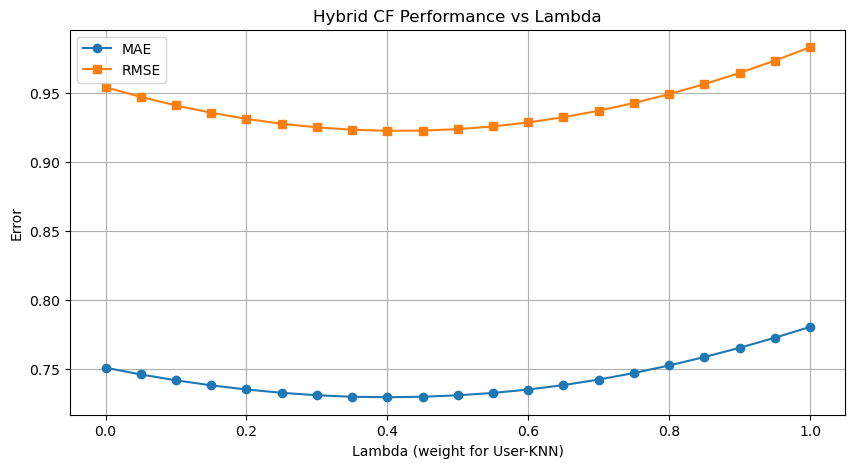


Hybrid CF Results (MAE, RMSE) for each lambda value:

Lambda: 0.00 -> MAE: 0.7510, RMSE: 0.9541
Lambda: 0.05 -> MAE: 0.7461, RMSE: 0.9470
Lambda: 0.10 -> MAE: 0.7419, RMSE: 0.9409
Lambda: 0.15 -> MAE: 0.7382, RMSE: 0.9356
Lambda: 0.20 -> MAE: 0.7352, RMSE: 0.9311
Lambda: 0.25 -> MAE: 0.7328, RMSE: 0.9276
Lambda: 0.30 -> MAE: 0.7310, RMSE: 0.9250
Lambda: 0.35 -> MAE: 0.7300, RMSE: 0.9233
Lambda: 0.40 -> MAE: 0.7296, RMSE: 0.9225
Lambda: 0.45 -> MAE: 0.7300, RMSE: 0.9226
Lambda: 0.50 -> MAE: 0.7310, RMSE: 0.9237
Lambda: 0.55 -> MAE: 0.7327, RMSE: 0.9257
Lambda: 0.60 -> MAE: 0.7352, RMSE: 0.9286
Lambda: 0.65 -> MAE: 0.7384, RMSE: 0.9324
Lambda: 0.70 -> MAE: 0.7424, RMSE: 0.9370
Lambda: 0.75 -> MAE: 0.7472, RMSE: 0.9426
Lambda: 0.80 -> MAE: 0.7526, RMSE: 0.9490
Lambda: 0.85 -> MAE: 0.7587, RMSE: 0.9563
Lambda: 0.90 -> MAE: 0.7654, RMSE: 0.9644
Lambda: 0.95 -> MAE: 0.7727, RMSE: 0.9733
Lambda: 1.00 -> MAE: 0.7805, RMSE: 0.9830

Best Lambda: 0.40 -> MAE: 0.7296, RMSE: 0.9225


In [24]:
# Tune lambda between 0 and 1
lambda_values = np.linspace(0, 1, 21)  # 0, 0.05, ..., 1
results_lambda = {}

for l in lambda_values:
    pred_hybrid = l * best_predicted + (1 - l) * best_predicted_item_knn
    mae, rmse = evaluate(test_ds, pred_hybrid)
    results_lambda[l] = (mae, rmse)

# Pick best lambda by lowest RMSE
best_lambda = min(results_lambda, key=lambda x: results_lambda[x][1])
MAE_solution5, RMSE_solution5 = results_lambda[best_lambda]

# Plot
mae_vals = [results_lambda[l][0] for l in lambda_values]
rmse_vals = [results_lambda[l][1] for l in lambda_values]

plt.figure(figsize=(10, 5))
plt.plot(lambda_values, mae_vals, marker='o', label='MAE')
plt.plot(lambda_values, rmse_vals, marker='s', label='RMSE')
plt.title('Hybrid CF Performance vs Lambda')
plt.xlabel('Lambda (weight for User-KNN)')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.savefig("method5.png")
plt.show()

print("\nHybrid CF Results (MAE, RMSE) for each lambda value:\n")
for l in lambda_values:
    mae, rmse = results_lambda[l]
    print(f"Lambda: {l:.2f} -> MAE: {mae:.4f}, RMSE: {rmse:.4f}")

print(f"\nBest Lambda: {best_lambda:.2f} -> MAE: {MAE_solution5:.4f}, RMSE: {RMSE_solution5:.4f}")

In [25]:
# Please don't change this cell

print("===================== The MAE and RMSE of Your Implementation =====================")
print("MAE: {}, RMSE: {}" .format(MAE_solution5, RMSE_solution5))

===================== The MAE and RMSE of Your Implementation =====================
MAE: 0.7296317187090167, RMSE: 0.9225101812220939
